Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = ""
COLLABORATORS = ""

---

# CSE 30 Winter 2022 - Homework 2


### Instructions

Please disregard the YOUR NAME and COLLABORATORS above.  They are put there automatically by the grading tool.
You can find instructions on how to work on a homework on Canvas.  Here is a short summary: 

### Submitting your work

To submit your work: 

* First, click on "Runtime > Restart and run all", and check that you get no errors.  This enables you to catch any error you might have introduced, and not noticed, due to your running cells out of order. 
* Second, download the notebook in .ipynb format (File > Download .ipynb) and upload the .ipynb file to [this form](https://docs.google.com/forms/d/e/1FAIpQLSfTCH85OvL1Q_7qLVrlj4blUCe_KyYK3w6dd1t-qS2OuD3URQ/viewform?usp=sf_link).  It is due in 1 week, on 15 January 2022.

You can submit multiple times; the last submission before the deadline is the one that counts.

### Homework format

For each question in this notebook, there is: 

* A text description of the problem. 
* One or more places where you have to insert your solution.  You need to complete every place marked: 

    `# YOUR CODE HERE`
    
    and you should not modify any other place. 
* One or more test cells.  Each cell is worth some number of points, marked at the top.  You should not modify these tests cells.  The tests pass if no error is printed out: when there is a statement that says, for instance: 

    `assert x == 2`
    
    then the test passes if `x` has value 2, and fails otherwise.  You can insert a `print(x)` (for this case!) somewhere if you want to debug your work; it is up to you.  
    
### Notes:

* Your code will be tested both according to the tests you can see (the `assert` statements you can see), _and_ additional tests.  This prevents you from hard-coding the answer to the particular questions posed.  Your code should solve the _general_ intended case, not hard-code the particular answer for the values used in the tests. 

* **Please do not delete or add cells!** The test is autograded, and if you modify the test by adding or deleting cells, even if you re-add cells you delete, you may not receive credit. 

* **Please do not import modules that are not part of the [standard library](https://docs.python.org/3/library/index.html).** You do not need any, and they will likely not available in the grading environment, leading your code to fail. 

* **If you are inactive too long, your notebook might get disconnected from the back-end.** Your work is never lost, but you have to re-run all the cells before you continue. 

* You can write out print statements in your code, to help you test/debug it. But remember: the code is graded on the basis of what it outputs or returns, not on the basis of what it prints.

* **TAs and tutors have access to this notebook,** so if you let them know you need their help, they can look at your work and give you advice. 

### Grading

Each cell where there are tests is worth a certain number of points.  You get the points allocated to a cell only if you pass _all_ the tests in the cell. 

The tests in a cell include both the tests you can see, and other, similar, tests that are used for grading only.  Therefore, you cannot hard-code the solutions: you really have to solve the essence of the problem, to receive the points in a cell. 

### Code of Conduct

* Work on the test yourself, alone. 
* You can search documentation on the web, on sites such as the Python documentation sites, Stackoverflow, and similar, and you can use the results. 
* You cannot share your work with others or solicit their help.


## Problem: Fractals

We want to have a bit of fun genrating fractals.  Let's first write a function that, given a sequence of (x,y) points, draws the corresponding polygon: 

In [2]:
import matplotlib.pyplot as plt

def draw_polygon(*coords, closed=True):
    co = list(coords)
    fix, ax = plt.subplots(1, 1)
    if closed and co[0] != co[-1]:
        co.append(co[0]) # Repeat first point
    xs, ys = zip(*co) # Splits coordinates
    ax.set_aspect('equal', 'box')
    ax.plot(xs, ys)
    plt.show()


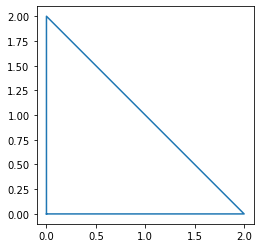

In [3]:
draw_polygon((0, 0), (0 , 2), (2, 0))


## Kinking lines

Whenever you have a line like this, from $(x_0, y_0)$ to $(x_1, y_1)$: 

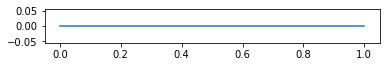

In [4]:
draw_polygon((0, 0), (1, 0), closed=False)


You need to add a "kink" to it, as follows: 

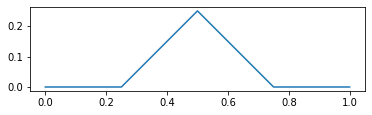

In [5]:
draw_polygon((0, 0), (0.25, 0), (0.5, 0.25), (0.75, 0), (1, 0), closed=False)


Now this kink must be invariant with respect to directions and scaling.  For example, if the original line was from up to down: 

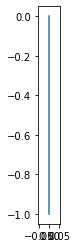

In [6]:
draw_polygon((0, 0), (0, -1), closed=False)


Then adding the kink will result in: 

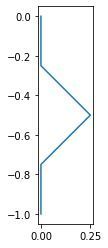

In [7]:
draw_polygon((0, 0), (0, -0.25), (0.25, -0.5), (0, -0.75), (0, -1), closed=False)


We call the above operation "adding a kink".  To define it mathematically, we need to use _vector addition_, so here is a quick reminder. If you have two vectors $v = (v_x, v_y)$ and $w = (w_x, w_y)$, their sum $z = v + w$ is computed in _componentwise fashion_, which you can do in code, like so: 

    vx, vy = v
    wx, wy = w
    z = (vx + wx, vy + wy)

With that notation, we can define adding a kink as follows. If you have a segment from point $p_0 = (x_0, y_0)$ to point $p_1 = (x_1, y_1)$, its direction is $\Delta = (x_1, y_1) - (x_0, y_0) = (x_1 - x_0, y_1 - y_0) = (\Delta_x, \Delta_y)$, and its perpendicular direction is $\nu = (-\Delta_y, \Delta_x)$.  The points along the kink are then: 

* $q_0 = p_0$ (initial point);
* $q_1 = p_0 + \frac{1}{4} \Delta$ (points where it "kinks up");
* $q_2 = p_0 + \frac{1}{2} \Delta + \frac{1}{4} \nu$ (tip of the kink); 
* $q_3 = p_0 + \frac{3}{4} \Delta$ (points where it kinks back to straight);
* $p_1$ (final point). 

The first task for you in implementing fractals is to implement a function `kink` that, given a segment from $p_0$ to $p_1$, returns the points $q_0, q_1, q_2, q_3$.  Every point here is represented as a tuple.  Note that the last point $p_1$ is _not_ returned (this will make it easier to kink a polygon).


In [8]:

def kink(p0, p1):
    """Returns the tuple of the four points q0, q1, q2, q3, resulting from kinking p0, p1.
    Note that each q is returned as a two-element tuple."""
    # YOUR CODE HERE
    
    # what is the delta given the formula x1 - x0, y1- y0
    delta = (p1[0] - p0[0], p1[1] - p0[1] )
    
    # what is the vector given the formula (-delta y, delta x)
    v = (-(p1[1] - p0[1]), p1[0] - p0[0] )

    q0 = p0  # initial point

    # record the first point, but only record the 0th place, followed by the second point
    # use the same formula for ease of understanding
    # formula is: for delta x => q1 = p0 + 1/4Δ => repeat for delta y 
    q1 = (p0[0] + (1/4)*(delta[0]), p0[1] + 1/4*(delta[1]))

    # formula is: for delta x => q2 = p0 + 1/2Δ + 1/4ν repeat for delta y
    q2 = (p0[0] + (1/2)*(delta[0]) + 1/4*(v[0]), p0[1] + (1/2)*(delta[1]) + 1/4*(v[1]))
    print(q2)

    # formula is: for delta x => q3 = p0 + 3/4Δ repeat for delta y
    q3 = (p0[0] + (3/4)*(delta[0]), p0[1] + 3/4*(delta[1]))

    # return final result
    return q0, q1, q2, q3

In [9]:
## Here you can test your code.
print(kink((0, 0), (0, -1)))

# YOUR CODE HERE


(0.25, -0.5)
((0, 0), (0.0, -0.25), (0.25, -0.5), (0.0, -0.75))


Let's check that this works for the two cases above. 

In [10]:
# 5 pt

assert kink((0, 0), (1, 0)) == ((0, 0), (0.25, 0.0), (0.5, 0.25), (0.75, 0.0))
assert kink((0, 0), (0, -1)) == ((0, 0), (0.0, -0.25), (0.25, -0.5), (0.0, -0.75))


(0.5, 0.25)
(0.25, -0.5)


For the general case, let us define an approximate comparison of a list of points. 

In [11]:
def approxeq(list1, list2, epsilon=0.001):
    assert len(list1) == len(list2)
    for p1, p2 in zip(list1, list2):
        x1, y1 = p1
        x2, y2 = p2
        assert abs(x2 - x1) < epsilon and abs(y2 - y1) < epsilon


In [12]:
approxeq(kink((0, 0), (1, 0)), ((0, 0), (0.25, 0.0), (0.5, 0.25), (0.75, 0.0)))


(0.5, 0.25)


In [13]:
# 10 points: The kink should work in general.

approxeq(kink((0, 0), (4, 5)), ((0, 0), (1.0, 1.25), (0.75, 3.5), (3.0, 3.75)))
approxeq(kink((4, 3), (-9, -1)), ((4, 3), (0.75, 2.0), (-1.5, -2.25), (-5.75, 0.0)))
### BEGIN HIDDEN TESTS
approxeq(kink((-3, -4), (3, -1)), ((-3, -4), (-1.5, -3.25), (-0.75, -1.0), (1.5, -1.75)))
approxeq(kink((3, 5), (1, 12)), ((3, 5), (2.5, 6.75), (0.25, 8.0), (1.5, 10.25)))
### END HIDDEN TESTS



(0.75, 3.5)
(-1.5, -2.25)
(-0.75, -1.0)
(0.25, 8.0)


## Kinking polygons

To kink a polygon, we simply kink every one of its segments.  It looks like this.  If the basic polygon is: 

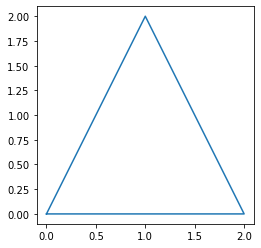

In [14]:
poly1 = [(0, 0), (1, 2), (2, 0)]
draw_polygon(*poly1)


Then its kinked version has to look like this: 

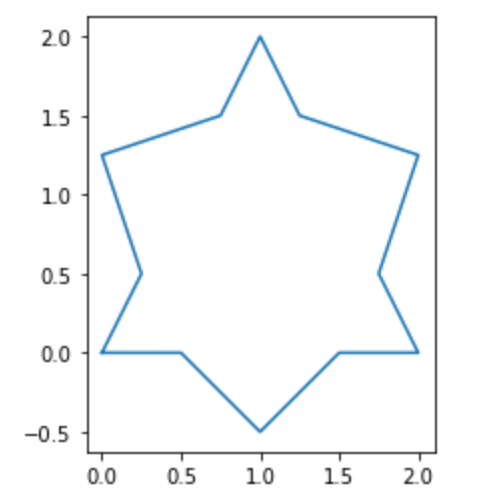

Write below the kinked polygon function. 

In [15]:
def kink_polygon(poly):
    # YOUR CODE HERE
    '''
    l = []
    x = []
    z = len(poly)
    start = 0
    for i in poly:
        start += 0 
        if l == z:
            l.append(kink[w-1], pol[0])

        elif: 

      for j in x: 
    '''

    count = 0
    # creat a list 
    n = []
    #iterate throught the coordinates of poly
    for i in poly:
        count += 1
        if count == len(poly):
    # find q0, q1, q2, and q3 and plug inot the kink eqation
    # then append the eqation into a list
            n.append(kink(poly[len(poly)-1], poly[0]))
        else: 
            n.append(kink(poly[count -1], poly[count]))

    np = []
    # iterated through the list (n) and append to another list 
    for i in n:
        for j in i:
            np.append(j)
    # return the value of the neweset list
    return np





        



    
   



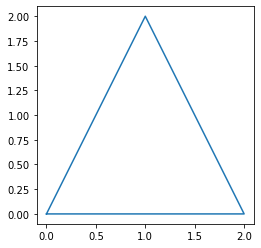

In [16]:
# You can use this space to debug your code.
poly1 = [(0, 0), (1, 2), (2, 0)]
# poly2 = kink_polygon(poly1)
draw_polygon(*poly1)
# YOUR CODE HERE


Let us check that the solution works as intended. 

(0.0, 1.25)
(2.0, 1.25)
(1.0, -0.5)


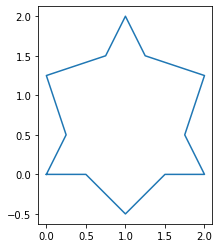

In [17]:
poly1 = [(0, 0), (1, 2), (2, 0)]
poly2 = kink_polygon(poly1)
draw_polygon(*poly2)


We can kink it one more time!

(0.0, 0.3125)
(-0.0625, 0.8125)
(0.3125, 1.5625)
(0.75, 1.8125)
(1.25, 1.8125)
(1.6875, 1.5625)
(2.0625, 0.8125)
(2.0, 0.3125)
(1.75, -0.125)
(1.375, -0.375)
(0.625, -0.375)
(0.25, -0.125)


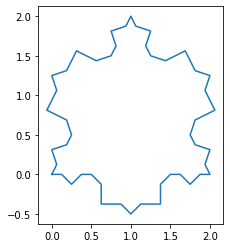

In [18]:
poly3 = kink_polygon(poly2)
draw_polygon(*poly3)


Let us check that your solution works. 

In [19]:
poly1 = [(0, 0), (1, 2), (2, 0)]
poly2 = kink_polygon(poly1)
approxeq(poly2, [(0, 0),
 (0.25, 0.5),
 (0.0, 1.25),
 (0.75, 1.5),
 (1, 2),
 (1.25, 1.5),
 (2.0, 1.25),
 (1.75, 0.5),
 (2, 0),
 (1.5, 0.0),
 (1.0, -0.5),
 (0.5, 0.0)])
poly3 = kink_polygon(poly2)
approxeq(poly3, [(0, 0),
 (0.0625, 0.125),
 (0.0, 0.3125),
 (0.1875, 0.375),
 (0.25, 0.5),
 (0.1875, 0.6875),
 (-0.0625, 0.8125),
 (0.0625, 1.0625),
 (0.0, 1.25),
 (0.1875, 1.3125),
 (0.3125, 1.5625),
 (0.5625, 1.4375),
 (0.75, 1.5),
 (0.8125, 1.625),
 (0.75, 1.8125),
 (0.9375, 1.875),
 (1, 2),
 (1.0625, 1.875),
 (1.25, 1.8125),
 (1.1875, 1.625),
 (1.25, 1.5),
 (1.4375, 1.4375),
 (1.6875, 1.5625),
 (1.8125, 1.3125),
 (2.0, 1.25),
 (1.9375, 1.0625),
 (2.0625, 0.8125),
 (1.8125, 0.6875),
 (1.75, 0.5),
 (1.8125, 0.375),
 (2.0, 0.3125),
 (1.9375, 0.125),
 (2, 0),
 (1.875, 0.0),
 (1.75, -0.125),
 (1.625, 0.0),
 (1.5, 0.0),
 (1.375, -0.125),
 (1.375, -0.375),
 (1.125, -0.375),
 (1.0, -0.5),
 (0.875, -0.375),
 (0.625, -0.375),
 (0.625, -0.125),
 (0.5, 0.0),
 (0.375, 0.0),
 (0.25, -0.125),
 (0.125, 0.0)])


(0.0, 1.25)
(2.0, 1.25)
(1.0, -0.5)
(0.0, 0.3125)
(-0.0625, 0.8125)
(0.3125, 1.5625)
(0.75, 1.8125)
(1.25, 1.8125)
(1.6875, 1.5625)
(2.0625, 0.8125)
(2.0, 0.3125)
(1.75, -0.125)
(1.375, -0.375)
(0.625, -0.375)
(0.25, -0.125)


Here are some hidden tests, just for the sake of suspense.

In [20]:
# 10 points.  Kinking a polygon in the dark.



## Areas and perimeter

What's interesting about fractals is their area and perimeter.  If you have a polygon 
$(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)$, you can find the area via: 

$$
\sum_{i = 1}^{n} (x_{i+1
} - x_i) \cdot \frac{y_i + y_{i+1}}{2} \; ,
$$

and the perimeter via

$$
\sum_{i=1}^n \sqrt{(x_{i+1} - x_i)^2 + (y_{i+1} - y_i)^2} \; , 
$$

where we have used the convention that $x_{n+1} = x_1$ and $y_{n+1} = y_1$. 
Write functions to implement the above and compute area and perimeter of a polygon. 

In [21]:

def poly_area(polygon):
    """Returns the area of a polygon."""
    n = len(polygon)

    area = 0 

    for i in range(n):
        x, y  = polygon[i][0], polygon[i][1]

        x_1, y_1 = polygon[(i + 1) % n][0], polygon[(i + 1) % n][1]

        area += (x_1 - x) * ((y + y_1) /2)
    return area
    '''
    x = []
    area = 0

    for i in polygon: 
    '''




In [22]:
from math import sqrt

def poly_perimeter(polygon):
    """Returns the perimeter of a polygon."""
    # YOUR CODE HERE

    n = len(polygon)

    perimeter = 0

    for i in range(n): 
        x, y = polygon[i][0], polygon[i][1]
      
        x_1, y_1 = polygon[(i + 1) % n][0], polygon[(i + 1) % n][1]

        perimeter += sqrt(((x_1 - x)**2) + ((y_1 - y)**2)) 

    return perimeter

 




In [23]:
## Here you can test your code.
print(poly_area([(0, 0), (1, 2), (2,0)]))
print(poly_perimeter([(0, 0), (0,5), (3, 5), (3,0)]))
#print(poly_area(poly1))
# YOUR CODE HERE


2.0
16.0


Let us test both functions. 

In [24]:
# 10 points: area and perimeter of polygons.

poly1 = [(0, 0), (1, 2), (2, 0)]
assert poly_area(poly1) == 2
assert abs(poly_perimeter(poly1) - 6.472) < 0.01



Let us visualize repeated kinking. 

(0.0, 1.25)
(2.0, 1.25)
(1.0, -0.5)


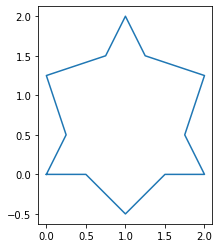

(0.0, 0.3125)
(-0.0625, 0.8125)
(0.3125, 1.5625)
(0.75, 1.8125)
(1.25, 1.8125)
(1.6875, 1.5625)
(2.0625, 0.8125)
(2.0, 0.3125)
(1.75, -0.125)
(1.375, -0.375)
(0.625, -0.375)
(0.25, -0.125)


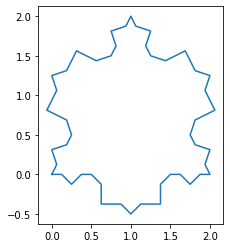

(0.0, 0.078125)
(-0.015625, 0.203125)
(0.078125, 0.390625)
(0.1875, 0.453125)
(0.171875, 0.578125)
(0.03125, 0.6875)
(-0.0625, 0.96875)
(-0.015625, 1.140625)
(0.078125, 1.328125)
(0.1875, 1.46875)
(0.46875, 1.5625)
(0.640625, 1.515625)
(0.75, 1.578125)
(0.734375, 1.703125)
(0.828125, 1.890625)
(0.9375, 1.953125)
(1.0625, 1.953125)
(1.171875, 1.890625)
(1.265625, 1.703125)
(1.25, 1.578125)
(1.359375, 1.515625)
(1.53125, 1.5625)
(1.8125, 1.46875)
(1.921875, 1.328125)
(2.015625, 1.140625)
(2.0625, 0.96875)
(1.96875, 0.6875)
(1.828125, 0.578125)
(1.8125, 0.453125)
(1.921875, 0.390625)
(2.015625, 0.203125)
(2.0, 0.078125)
(1.9375, -0.03125)
(1.84375, -0.09375)
(1.65625, -0.09375)
(1.5625, -0.03125)
(1.46875, -0.09375)
(1.4375, -0.25)
(1.25, -0.4375)
(1.09375, -0.46875)
(0.90625, -0.46875)
(0.75, -0.4375)
(0.5625, -0.25)
(0.53125, -0.09375)
(0.4375, -0.03125)
(0.34375, -0.09375)
(0.15625, -0.09375)
(0.0625, -0.03125)


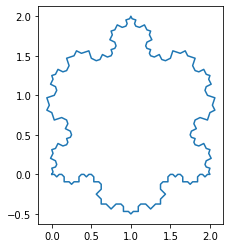

(0.0, 0.01953125)
(-0.00390625, 0.05078125)
(0.01953125, 0.09765625)
(0.046875, 0.11328125)
(0.04296875, 0.14453125)
(0.0078125, 0.171875)
(-0.015625, 0.2421875)
(-0.00390625, 0.28515625)
(0.01953125, 0.33203125)
(0.046875, 0.3671875)
(0.1171875, 0.390625)
(0.16015625, 0.37890625)
(0.1875, 0.39453125)
(0.18359375, 0.42578125)
(0.20703125, 0.47265625)
(0.234375, 0.48828125)
(0.23046875, 0.51953125)
(0.1953125, 0.546875)
(0.171875, 0.6171875)
(0.18359375, 0.66015625)
(0.1484375, 0.6875)
(0.0859375, 0.6796875)
(-0.0078125, 0.7265625)
(-0.0390625, 0.78125)
(-0.0625, 0.8515625)
(-0.0703125, 0.9140625)
(-0.0234375, 1.0078125)
(0.03125, 1.0390625)
(0.04296875, 1.08203125)
(0.0078125, 1.109375)
(-0.015625, 1.1796875)
(-0.00390625, 1.22265625)
(0.01953125, 1.26953125)
(0.046875, 1.3046875)
(0.1171875, 1.328125)
(0.16015625, 1.31640625)
(0.1875, 1.3515625)
(0.1796875, 1.4140625)
(0.2265625, 1.5078125)
(0.28125, 1.5390625)
(0.3515625, 1.5625)
(0.4140625, 1.5703125)
(0.5078125, 1.5234375)
(0.53906

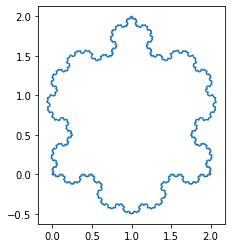

(0.0, 0.0048828125)
(-0.0009765625, 0.0126953125)
(0.0048828125, 0.0244140625)
(0.01171875, 0.0283203125)
(0.0107421875, 0.0361328125)
(0.001953125, 0.04296875)
(-0.00390625, 0.060546875)
(-0.0009765625, 0.0712890625)
(0.0048828125, 0.0830078125)
(0.01171875, 0.091796875)
(0.029296875, 0.09765625)
(0.0400390625, 0.0947265625)
(0.046875, 0.0986328125)
(0.0458984375, 0.1064453125)
(0.0517578125, 0.1181640625)
(0.05859375, 0.1220703125)
(0.0576171875, 0.1298828125)
(0.048828125, 0.13671875)
(0.04296875, 0.154296875)
(0.0458984375, 0.1650390625)
(0.037109375, 0.171875)
(0.021484375, 0.169921875)
(-0.001953125, 0.181640625)
(-0.009765625, 0.1953125)
(-0.015625, 0.212890625)
(-0.017578125, 0.228515625)
(-0.005859375, 0.251953125)
(0.0078125, 0.259765625)
(0.0107421875, 0.2705078125)
(0.001953125, 0.27734375)
(-0.00390625, 0.294921875)
(-0.0009765625, 0.3056640625)
(0.0048828125, 0.3173828125)
(0.01171875, 0.326171875)
(0.029296875, 0.33203125)
(0.0400390625, 0.3291015625)
(0.046875, 0.337890

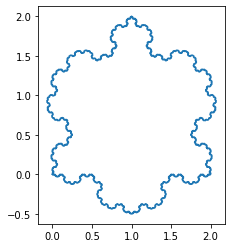

(0.0, 0.001220703125)
(-0.000244140625, 0.003173828125)
(0.001220703125, 0.006103515625)
(0.0029296875, 0.007080078125)
(0.002685546875, 0.009033203125)
(0.00048828125, 0.0107421875)
(-0.0009765625, 0.01513671875)
(-0.000244140625, 0.017822265625)
(0.001220703125, 0.020751953125)
(0.0029296875, 0.02294921875)
(0.00732421875, 0.0244140625)
(0.010009765625, 0.023681640625)
(0.01171875, 0.024658203125)
(0.011474609375, 0.026611328125)
(0.012939453125, 0.029541015625)
(0.0146484375, 0.030517578125)
(0.014404296875, 0.032470703125)
(0.01220703125, 0.0341796875)
(0.0107421875, 0.03857421875)
(0.011474609375, 0.041259765625)
(0.00927734375, 0.04296875)
(0.00537109375, 0.04248046875)
(-0.00048828125, 0.04541015625)
(-0.00244140625, 0.048828125)
(-0.00390625, 0.05322265625)
(-0.00439453125, 0.05712890625)
(-0.00146484375, 0.06298828125)
(0.001953125, 0.06494140625)
(0.002685546875, 0.067626953125)
(0.00048828125, 0.0693359375)
(-0.0009765625, 0.07373046875)
(-0.000244140625, 0.076416015625)
(0.

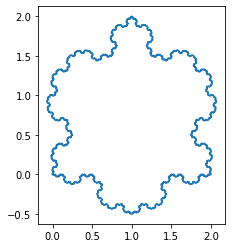

In [25]:
poly = [(0, 0), (1, 2), (2, 0)]
for n in range(6):
    poly = kink_polygon(poly)
    draw_polygon(*poly)


Let's see how area and perimeter change as we add kinks. 

In [26]:
# 5 points.  Behavior of perimeter, area.

poly = [(0, 0), (0, 1), (1, 1), (1, 0)]
for n in range(7):
    poly = kink_polygon(poly)
    area = poly_area(poly)
    perim = poly_perimeter(poly)
    print("Area:", area, "Perimeter:", perim)
assert 14.9 < perim < 15
assert 1.399 < area < 1.4


Streaming output truncated to the last 5000 lines.
(1.0150146484375, 0.2210693359375)
(1.0150146484375, 0.2203369140625)
(1.0147705078125, 0.219970703125)
(1.01483154296875, 0.21966552734375)
(1.01513671875, 0.2196044921875)
(1.0155029296875, 0.21923828125)
(1.01556396484375, 0.21893310546875)
(1.01556396484375, 0.21856689453125)
(1.0155029296875, 0.21826171875)
(1.01513671875, 0.2178955078125)
(1.01483154296875, 0.21783447265625)
(1.0147705078125, 0.217529296875)
(1.0150146484375, 0.2171630859375)
(1.0150146484375, 0.2164306640625)
(1.0147705078125, 0.216064453125)
(1.014404296875, 0.2156982421875)
(1.0140380859375, 0.2154541015625)
(1.0133056640625, 0.2154541015625)
(1.012939453125, 0.2156982421875)
(1.01263427734375, 0.21563720703125)
(1.0125732421875, 0.21533203125)
(1.01220703125, 0.2149658203125)
(1.01190185546875, 0.21490478515625)
(1.0118408203125, 0.214599609375)
(1.0120849609375, 0.2142333984375)
(1.0120849609375, 0.2135009765625)
(1.0118408203125, 0.213134765625)
(1.01208496

See what happens?  The area converges, but the perimeter does not.  You end up with a finite area with an infinite perimeter.  That's true for every polygon you start with: 

In [27]:
# 5 points.  Behavior of perimeter, area

poly = [(0, 1), (1, 4), (6, 4), (8, 1)]
for n in range(7):
    poly = kink_polygon(poly)
    area = poly_area(poly)
    perim = poly_perimeter(poly)
    print("Area:", area, "Perimeter:", perim)
assert 30.6 < area < 31
assert 73 < perim < 74


Streaming output truncated to the last 5000 lines.
(7.6029052734375, 1.6932373046875)
(7.6043701171875, 1.6910400390625)
(7.6043701171875, 1.689453125)
(7.60516357421875, 1.68865966796875)
(7.606201171875, 1.6890869140625)
(7.6080322265625, 1.688720703125)
(7.60882568359375, 1.68792724609375)
(7.60955810546875, 1.68682861328125)
(7.6099853515625, 1.685791015625)
(7.609619140625, 1.6839599609375)
(7.60882568359375, 1.68316650390625)
(7.6092529296875, 1.68212890625)
(7.6107177734375, 1.6815185546875)
(7.6121826171875, 1.6793212890625)
(7.6121826171875, 1.677734375)
(7.61181640625, 1.6759033203125)
(7.6112060546875, 1.6744384765625)
(7.6090087890625, 1.6729736328125)
(7.607421875, 1.6729736328125)
(7.60662841796875, 1.67218017578125)
(7.6070556640625, 1.671142578125)
(7.606689453125, 1.6693115234375)
(7.60589599609375, 1.66851806640625)
(7.6063232421875, 1.66748046875)
(7.6077880859375, 1.6668701171875)
(7.6092529296875, 1.6646728515625)
(7.6092529296875, 1.6630859375)
(7.6107177734375, 1